In [58]:
import pandas as pd
from pandas import Series, DataFrame
import datetime
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
import seaborn as sns
from string import ascii_letters
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats


In [59]:
#Read Data from the master data set
main_data=pd.read_csv('hotel_bookings.csv')


In [73]:
# Add check_in_Date column by combining day, month and year data for ease of data manipulation
main_data.head()
main_data['Check_in_Date'] = main_data['arrival_date_year'].astype(str) + '-'+ main_data['arrival_date_month'].astype(str) + '-' + main_data['arrival_date_day_of_month'].astype(str)

main_data['Check_in_Date'] = main_data['Check_in_Date'] .astype('datetime64[ns]') 
main_data['no_of_bookings']=0


In [74]:
#check for NA values and assign 0
main_data.isna().sum()
main_data=main_data.fillna(0)

In [75]:
#Check if NA is refilled
main_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21066 entries, 0 to 21065
Data columns (total 31 columns):
partner_ID                              21066 non-null int64
hotel                                   21066 non-null object
is_canceled                             21066 non-null int64
total_cost                              21066 non-null int64
days_betwee_reservation_and_check_in    21066 non-null int64
arrival_date_year                       21066 non-null int64
arrival_date_month                      21066 non-null object
arrival_date_week_number                21066 non-null int64
arrival_date_day_of_month               21066 non-null int64
stays_in_weekend_nights                 21066 non-null int64
stays_in_week_nights                    21066 non-null int64
adults                                  21066 non-null int64
children                                21066 non-null float64
babies                                  21066 non-null int64
meal_booked                      

In [76]:
# Creating an empty Dataframe with column names only
hotelDF = pd.DataFrame(index=range(803),columns=['Date_range', '25', '21', '18', '2', '28','27',  '6', '22',  '8', '19', '24', '26', '30',  '3', '12',  '7', '10',
       '14',  '1', '11',  '4', '20',  '9', '23', '15', '29', '13', '16', '17',  '5'])
hotelDF

,Date_range,25,21,18,2,28,27,6,22,8,...,4,20,9,23,15,29,13,16,17,5
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
798,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
799,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
#trying to find the occupancy per day
len(hotelDF)
date_range = pd.date_range(start='1-July-2015', end='10-September-2017',freq='D')
p=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]
hotelDF = hotelDF.assign(Date_range=date_range)
hotelDF.fillna(0)
hotelDF=hotelDF.fillna(0)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


[Text(0.5, 0, 'Total cost')]

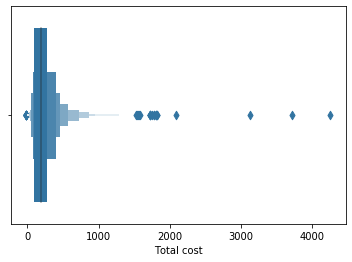

In [79]:
# Depict a Box plot for total cost
ax = sns.boxenplot(x=main_data["total_cost"])
ax.set(xlabel='Total cost')


In [80]:
# Summary Statistics
main_data.describe()

,partner_ID,is_canceled,total_cost,days_betwee_reservation_and_check_in,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,required_car_parking_spaces,total_of_special_requests,no_of_bookings,total_stay,year
count,21066.000000,21066.000000,21066.000000,21066.000000,21066.000000,21066.000000,21066.000000,21066.000000,21066.000000,21066.000000,...,21066.000000,21066.000000,21066.000000,21066.000000,21066.000000,21066.000000,21066.000000,21066.0,21066.000000,21066.000000
mean,15.457562,0.371784,221.626792,103.808412,2016.155037,27.214421,15.882702,0.934634,2.509352,1.853366,...,0.007358,0.031188,0.104244,0.139466,0.217792,0.061948,0.569164,0.0,3.443986,2016.155037
std,8.643869,0.483293,166.815889,106.741562,0.707145,13.652109,8.796967,1.013439,1.947308,0.485931,...,0.085464,0.173829,1.056556,1.555893,0.619440,0.252230,0.787082,0.0,2.619002,0.707145
min,1.000000,0.000000,-20.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,2015.000000
25%,8.000000,0.000000,100.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,2.000000,2016.000000
50%,15.000000,0.000000,190.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,3.000000,2016.000000
75%,23.000000,1.000000,280.000000,161.000000,2017.000000,38.000000,24.000000,2.000000,3.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,4.000000,2017.000000
max,30.000000,1.000000,4250.000000,629.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,4.000000,...,1.000000,1.000000,26.000000,65.000000,17.000000,8.000000,5.000000,0.0,69.000000,2017.000000


[Text(0, 0.5, 'Total days of stay'), Text(0.5, 0, 'Year')]

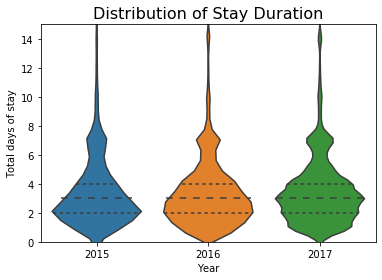

In [81]:
# Depict a violin plot for distribution of Stay Duration
main_data['total_stay']=main_data['stays_in_weekend_nights']+main_data['stays_in_week_nights']
#ax = sns.violinplot(x=year, y=Week_day_stay, hue=w_day, data=main_data, palette="muted", split=True)
main_data['year']=main_data['arrival_date_year']
ax.set_ylabel('Observed values')
plt.ylim(0, 15)

ax = sns.violinplot(x=main_data['year'],y=main_data['total_stay'],inner='quartile',data=main_data,scale='width')
ax.set_title('Distribution of Stay Duration', fontsize=16);
ax.set(xlabel='Year',ylabel='Total days of stay')


In [82]:
hotelDF

,Date_range,25,21,18,2,28,27,6,22,8,...,4,20,9,23,15,29,13,16,17,5
0,2015-07-01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2015-07-02,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2015-07-03,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2015-07-04,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2015-07-05,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
798,2017-09-06,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
799,2017-09-07,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
800,2017-09-08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
801,2017-09-09,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [83]:
# Determine Per Day booking based on the variables, stays_in_weekend_nights and stays_in_weekend_nights
for index1, hotel_data_rows in hotelDF.iterrows(): 
    dictPartnerIDs = dict.fromkeys(p , 0)
    filterBy_Date =  main_data['Check_in_Date']==hotel_data_rows['Date_range']
    dateFilter = main_data[filterBy_Date]

    for index2, main_data_rows in dateFilter.iterrows():
        if(hotel_data_rows['Date_range'] == main_data_rows['Check_in_Date']) :
            for j in hotelDF.columns[p]:
                if (int(j)==int(main_data_rows['partner_ID'])):
                    # Update the no of bookings for each partner id
                    tempCount=dictPartnerIDs.get(int(j))
                    dictPartnerIDs[int(j)]=int(tempCount)+1
                    main_data.set_value(index2,'no_of_bookings',dictPartnerIDs[int(j)])
                    stay_duration=main_data_rows['stays_in_weekend_nights']+main_data_rows['stays_in_week_nights']
                    for i in range(stay_duration):
                        assignValue=hotelDF.get_value(index1+i,j)
                        hotelDF.set_value(index1+i,j,int(assignValue+1))



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


In [86]:
hotelDF.to_csv('hotel_stats_latest.csv')

3887
10026
7153
{'January': 0.0, 'February': 0.0, 'March': 0.0, 'April': 0.0, 'May': 0.0, 'June': 0.0, 'July': 13.094931824028814, 'August': 17.494211474144585, 'September': 22.69102135322871, 'October': 22.356573192693592, 'November': 10.77952148186262, 'December': 13.583740674041678}
{'January': 0.0, 'February': 0.0, 'March': 0.0, 'April': 0.0, 'May': 0.0, 'June': 0.0, 'July': 13.094931824028814, 'August': 17.494211474144585, 'September': 22.69102135322871, 'October': 22.356573192693592, 'November': 10.77952148186262, 'December': 13.583740674041678}
{'January': 3.9696788350289247, 'February': 6.941950927588271, 'March': 8.098942748852982, 'April': 9.864352683024137, 'May': 9.505286255735088, 'June': 9.355675244364651, 'July': 8.148813085976462, 'August': 8.737283064033512, 'September': 9.704767604229005, 'October': 10.662278076999801, 'November': 7.8595651306602825, 'December': 7.151406343506881}
{'January': 9.101076471410597, 'February': 10.359289808471969, 'March': 12.6100936669928

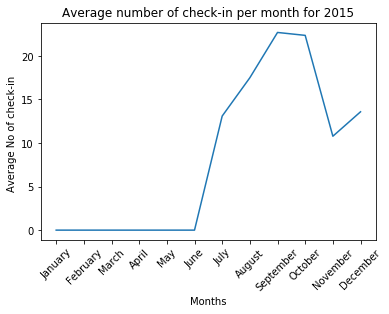

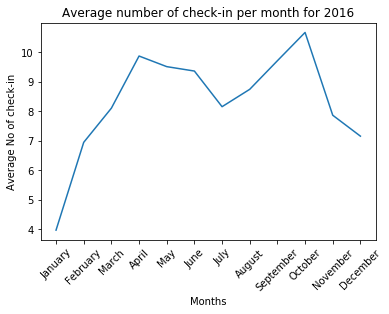

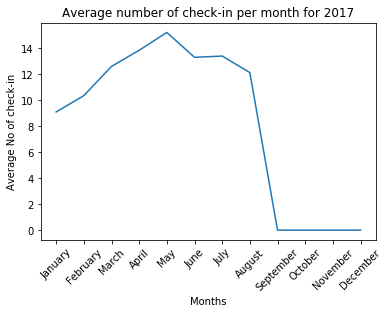

In [96]:
#Average of checkin  each month yearwise
total_2015 = (main_data['arrival_date_year'] == 2015)
yearFilter2015 = main_data[total_2015]

total_2016 = (main_data['arrival_date_year'] == 2016)
yearFilter2016 = main_data[total_2016]

total_2017 = (main_data['arrival_date_year'] == 2017)
yearFilter2017 = main_data[total_2017]


print(len(yearFilter2015))
print(len(yearFilter2016))
print(len(yearFilter2017))

months=['January','February','March','April','May','June','July','August','September','October','November','December']

year_2015=dict.fromkeys(months , 0)
year_2016=dict.fromkeys(months , 0)
year_2017=dict.fromkeys(months , 0)

    

for j in months:
    eachMonth = yearFilter2015['arrival_date_month'] == j
    eachmonth_cancel=yearFilter2015['is_canceled'] == j
    eachMonthFilter=yearFilter2015[eachMonth]
    eachmonth_canceFilter=yearFilter2015[eachmonth_cancel]
    year_2015[j]=((len(eachMonthFilter)-len(eachmonth_canceFilter))/len(yearFilter2015))*100
print(year_2015)
for j in months:
    eachMonth = yearFilter2016['arrival_date_month'] == j
    eachmonth_cancel=yearFilter2016['is_canceled'] == j
    eachmonth_canceFilter=yearFilter2016[eachmonth_cancel]
    eachMonthFilter=yearFilter2016[eachMonth]
    year_2016[j]=((len(eachMonthFilter)-len(eachmonth_canceFilter))/len(yearFilter2016))*100

for j in months:
    eachMonth = yearFilter2017['arrival_date_month'] == j
    eachMonthFilter=yearFilter2017[eachMonth]
    eachmonth_cancel=yearFilter2017['is_canceled'] == j
    eachmonth_canceFilter=yearFilter2017[eachmonth_cancel]

    year_2017[j]=(((len(eachMonthFilter)-len(eachmonth_canceFilter)))/len(yearFilter2017))*100

print(year_2015)
print(year_2016)
print(year_2017)
import matplotlib.pyplot as plt
#plt.bar(list(year_2015.keys()),year_2015.values())
#plt.show()
#plt.bar(list(year_2016.keys()),year_2016.values())
#plt.show()
#plt.bar(list(year_2017.keys()),year_2017.values())
#plt.show()
#import seaborn as sns
#sns.set(style="whitegrid")
#from matplotlib.pyplot import figure
#figure(num=None, figsize=(4, 4), dpi=80, facecolor='w', edgecolor='k')

lists = year_2015.items() # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.plot(x, y)
plt.xticks(rotation=45)
plt.title('Average number of check-in per month for 2015')
plt.xlabel('Months')
plt.ylabel('Average No of check-in ')

plt.show()
lists = year_2016.items() # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.plot(x, y)
plt.xticks(rotation=45)
plt.title('Average number of check-in per month for 2016')
plt.xlabel('Months')
plt.ylabel('Average No of check-in')

plt.show()
lists = year_2017.items() # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.plot(x, y)
plt.xticks(rotation=45)
plt.title('Average number of check-in per month for 2017')
plt.xlabel('Months')
plt.ylabel('Average No of check-in')

plt.show()



In [88]:
hotelDF.to_csv('hotel_data_stats.csv')

In [90]:
#average total cost for each partner id for 3 years
#5% total cost to partners
total_2015_cost = (main_data['arrival_date_year'] == 2015)
yearFilter2015_cost = main_data[total_2015_cost]

total_2016_cost = (main_data['arrival_date_year'] == 2016)
yearFilter2016_cost = main_data[total_2016_cost]

total_2017_cost = (main_data['arrival_date_year'] == 2017)
yearFilter2017_cost = main_data[total_2017_cost]

partnerIDs = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]

year_2015_cost=dict.fromkeys(partnerIDs, 0)
print(year_2015_cost)
year_2016_cost=dict.fromkeys(partnerIDs, 0)
year_2017_cost=dict.fromkeys(partnerIDs, 0)

for j in partnerIDs:
    eachPartnerID = yearFilter2015_cost['partner_ID'] == j
    eachPartner=yearFilter2015_cost[eachPartnerID]
    print(eachPartner['total_cost'])
    year_2015_cost[j] = (eachPartner['total_cost'].sum())/6
    
for j in partnerIDs:
    eachPartnerID = yearFilter2016_cost['partner_ID'] == j
    eachPartner=yearFilter2016_cost[eachPartnerID]
    year_2016_cost[j]= (eachPartner['total_cost'].sum())/12

for j in partnerIDs:
    eachPartnerID = yearFilter2017_cost['partner_ID'] == j
    eachPartner=yearFilter2017_cost[eachPartnerID]
    year_2017_cost[j]= (eachPartner['total_cost'].sum())/8

    
print(year_2015_cost)
print(year_2016_cost)
print(year_2017_cost)



{1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0, 21: 0, 22: 0, 23: 0, 24: 0, 25: 0, 26: 0, 27: 0, 28: 0, 29: 0, 30: 0}
28       640
32       250
112      660
121      350
156      430
        ... 
14387    230
14537    150
14571    300
14583    100
14601    200
Name: total_cost, Length: 122, dtype: int64
3        910
24       730
36       460
44       190
76       550
        ... 
14248     50
14258    280
14297    190
14554    200
14596    170
Name: total_cost, Length: 109, dtype: int64
20        50
111      550
120      290
141      140
169      150
        ... 
14313     80
14320    100
14332    330
14381    190
14587    100
Name: total_cost, Length: 133, dtype: int64
34       410
58       430
66       840
80       240
110      480
        ... 
14390    300
14423    100
14576    190
14586     60
14594    200
Name: total_cost, Length: 133, dtype: int64
125      150
205      430
241      480
261      43

In [91]:
def heatMap(df):
    #Create Correlation df
    corr = df.corr()
    #Plot figsize
    fig, ax = plt.subplots(figsize=(10, 10))
    #Generate Color Map
    colormap = sns.diverging_palette(220, 10, as_cmap=True)
    #Generate Heat Map, allow annotations and place floats in map
    sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
    #Apply xticks
    plt.xticks(range(len(corr.columns)), corr.columns);
    #Apply yticks
    plt.yticks(range(len(corr.columns)), corr.columns)
    #show plot
    plt.show()


In [93]:
from sklearn import preprocessing 

 

years=[2015,2016,2017]

 

hotelMonthlyDF = pd.DataFrame(columns=['partner_ID','arrival_date_year','arrival_date_month','no_of_bookings','is_canceled','total_cost','stays_in_weekend_nights','stays_in_week_nights','adults','children','reserved vs assigned same','reserved vs assigned upgrades','reserved vs assigned downgrades'])

 

label_encoder = preprocessing.LabelEncoder() 

col=['reserved_room_type', 'assigned_room_type']

for i in col:

    main_data[i]= label_encoder.fit_transform(main_data[i]) 

 

main_index=0

 

for y in years:

    total_daily = hotelDF.Date_range.dt.year == y

    generated_DF = hotelDF[total_daily]

 

    total_monthly = (main_data['arrival_date_year'] == y)

    yearFilter_month = main_data[total_monthly]

 

    partnerIDs = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]

    months=['January','February','March','April','May','June','July','August','September','October','November','December']

    monthsInNos=[1,2,3,4,5,6,7,8,9,10,11,12]

    for index, m in enumerate(months):

        eachMonth = yearFilter_month['arrival_date_month'] == m

        eachMonthFilter=yearFilter_month[eachMonth]

        eachMonth_Daily = generated_DF.Date_range.dt.month == index+1

        eachMonthDailyFilter=generated_DF[eachMonth_Daily]

        if(len(eachMonthFilter)>0):

            for j in partnerIDs:

                same = 0

                upgrade = 0

                downgrade = 0

                eachPartnerID = eachMonthFilter['partner_ID'] == int(j)

                eachPartner = eachMonthFilter[eachPartnerID]

                hotelMonthlyDF.set_value(main_index,'partner_ID',j)

                hotelMonthlyDF.set_value(main_index,'arrival_date_year',y)

                #print(hotelMonthlyDF.get_value(index,'arrival_date_year'))

                hotelMonthlyDF.set_value(main_index,'arrival_date_month',m)                                      

                hotelMonthlyDF.set_value(main_index,'is_canceled',eachPartner['is_canceled'].sum())
                hotelMonthlyDF.set_value(main_index,'total_cost',eachPartner['total_cost'].sum())

                hotelMonthlyDF.set_value(main_index,'stays_in_weekend_nights',eachPartner['stays_in_weekend_nights'].sum())

                hotelMonthlyDF.set_value(main_index,'stays_in_week_nights',eachPartner['stays_in_week_nights'].sum())                                      

                hotelMonthlyDF.set_value(main_index,'adults',eachPartner['adults'].sum())                                      

                hotelMonthlyDF.set_value(main_index,'children',eachPartner['children'].sum())                                                                              
                hotelMonthlyDF.set_value(main_index,'commission_paid',(eachPartner['total_cost'].sum()*0.05))                                                                              
                for i, hotel_data_rows in eachPartner.iterrows():

                    if(hotel_data_rows['reserved_room_type'] == hotel_data_rows['assigned_room_type']):

                        same=same+1

                    elif(hotel_data_rows['reserved_room_type'] > hotel_data_rows['assigned_room_type']):                          

                        upgrade=upgrade+1

                    elif(hotel_data_rows['reserved_room_type'] < hotel_data_rows['assigned_room_type']):

                        downgrade=downgrade+1                              

                hotelMonthlyDF.set_value(main_index,'reserved vs assigned same',same)                                                                             

                hotelMonthlyDF.set_value(main_index,'reserved vs assigned upgrades',upgrade)                                                                             

                hotelMonthlyDF.set_value(main_index,'reserved vs assigned downgrades',downgrade)                                                                                                                     

                hotelMonthlyDF.set_value(main_index,'no_of_bookings',eachMonthDailyFilter[str(j)].sum())
                hotelMonthlyDF.set_value(main_index,'overbooking',(eachMonthDailyFilter[str(j)].sum()-15))                                                                              

                main_index = main_index+1

hotelMonthlyDF

hotelMonthlyDF.to_csv('Monthly_statistics.csv')
hotelMonthlyDF



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:71: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:73: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:77: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:79: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:80: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/opt/anaconda3/lib/python3.7/s

,partner_ID,arrival_date_year,arrival_date_month,no_of_bookings,is_canceled,total_cost,stays_in_weekend_nights,stays_in_week_nights,adults,children,reserved vs assigned same,reserved vs assigned upgrades,reserved vs assigned downgrades,commission_paid,overbooking
0,1.0,2015,July,87,9,5790,25,65,34,0,16,0,2,289.5,72.0
1,2.0,2015,July,79,6,5210,24,55,37,3,14,1,3,260.5,64.0
2,3.0,2015,July,48,9,3190,13,36,30,0,13,0,2,159.5,33.0
3,4.0,2015,July,64,10,4260,21,44,33,1,16,0,1,213.0,49.0
4,5.0,2015,July,24,3,1710,10,15,12,2,6,0,0,85.5,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,26.0,2017,August,134,13,7550,32,92,63,7,32,0,0,377.5,119.0
776,27.0,2017,August,126,7,6570,21,90,51,6,24,1,1,328.5,111.0
777,28.0,2017,August,126,8,7030,27,81,61,11,27,0,1,351.5,111.0
778,29.0,2017,August,127,12,8040,33,88,63,5,28,0,3,402.0,112.0


In [17]:
hotelMonthlyDF.loc[hotelMonthlyDF.arrival_date_month == 'January', 'monthNo'] = 1
hotelMonthlyDF.loc[hotelMonthlyDF.arrival_date_month == 'February', 'monthNo'] = 2
hotelMonthlyDF.loc[hotelMonthlyDF.arrival_date_month == 'March', 'monthNo'] = 3
hotelMonthlyDF.loc[hotelMonthlyDF.arrival_date_month == 'April', 'monthNo'] = 4
hotelMonthlyDF.loc[hotelMonthlyDF.arrival_date_month == 'May', 'monthNo'] = 5
hotelMonthlyDF.loc[hotelMonthlyDF.arrival_date_month == 'June', 'monthNo'] = 6
hotelMonthlyDF.loc[hotelMonthlyDF.arrival_date_month == 'July', 'monthNo'] = 7
hotelMonthlyDF.loc[hotelMonthlyDF.arrival_date_month == 'August', 'monthNo'] = 8
hotelMonthlyDF.loc[hotelMonthlyDF.arrival_date_month == 'September', 'monthNo'] = 9
hotelMonthlyDF.loc[hotelMonthlyDF.arrival_date_month == 'October', 'monthNo'] = 10
hotelMonthlyDF.loc[hotelMonthlyDF.arrival_date_month == 'November', 'monthNo'] = 11
hotelMonthlyDF.loc[hotelMonthlyDF.arrival_date_month == 'December', 'monthNo'] = 12
hotelMonthlyDF

,partner_ID,arrival_date_year,arrival_date_month,no_of_bookings,is_canceled,total_cost,stays_in_weekend_nights,stays_in_week_nights,adults,children,reserved vs assigned same,reserved vs assigned upgrades,reserved vs assigned downgrades,monthNo
0,1,2015,July,87,9,5790,25,65,34,0,16,0,2,7.0
1,2,2015,July,79,6,5210,24,55,37,3,14,1,3,7.0
2,3,2015,July,48,9,3190,13,36,30,0,13,0,2,7.0
3,4,2015,July,64,10,4260,21,44,33,1,16,0,1,7.0
4,5,2015,July,24,3,1710,10,15,12,2,6,0,0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,26,2017,August,0,13,7550,32,92,63,7,32,0,0,8.0
776,27,2017,August,0,7,6570,21,90,51,6,24,1,1,8.0
777,28,2017,August,0,8,7030,27,81,61,11,27,0,1,8.0
778,29,2017,August,0,12,8040,33,88,63,5,28,0,3,8.0


In [22]:
X = hotelMonthlyDF.drop(['no_of_bookings','arrival_date_month'],axis=1)
y = hotelMonthlyDF['no_of_bookings']


Coefficients: 
 [ 2.54829952e-02 -7.33366206e+01 -1.84482601e+00 -5.82986718e-03
  2.22926521e-01  1.16869691e+00  2.25825037e+00  9.72151560e-01
 -2.55934050e+00  2.17963667e+00 -3.08655606e+00 -7.92694454e+00]


In [20]:
hotelMonthlyDF.columns

Index(['partner_ID', 'arrival_date_year', 'arrival_date_month',
       'no_of_bookings', 'is_canceled', 'total_cost',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'reserved vs assigned same', 'reserved vs assigned upgrades',
       'reserved vs assigned downgrades', 'monthNo'],
      dtype='object')

In [29]:
X = np.column_stack((hotelMonthlyDF['partner_ID'],  hotelMonthlyDF['arrival_date_year'] , hotelMonthlyDF['is_canceled'], hotelMonthlyDF['total_cost'], hotelMonthlyDF['stays_in_weekend_nights'], hotelMonthlyDF['stays_in_week_nights'], hotelMonthlyDF['adults'], hotelMonthlyDF['children'], hotelMonthlyDF['reserved vs assigned same'], hotelMonthlyDF['reserved vs assigned upgrades'], hotelMonthlyDF['reserved vs assigned downgrades'], hotelMonthlyDF['monthNo']))
print(X)
y = hotelMonthlyDF['no_of_bookings']
print(y)
X2 = sm.add_constant((X))
est = sm.OLS(y.astype(float), X2.astype(float)).fit()

print(est.summary())



[[1 2015 9 ... 0 2 7.0]
 [2 2015 6 ... 1 3 7.0]
 [3 2015 9 ... 0 2 7.0]
 ...
 [28 2017 8 ... 0 1 8.0]
 [29 2017 12 ... 0 3 8.0]
 [30 2017 13 ... 0 0 8.0]]
0      87
1      79
2      48
3      64
4      24
       ..
775     0
776     0
777     0
778     0
779     0
Name: no_of_bookings, Length: 780, dtype: object
                            OLS Regression Results                            
Dep. Variable:         no_of_bookings   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     155.6
Date:                Sun, 01 Mar 2020   Prob (F-statistic):          4.12e-196
Time:                        18:46:15   Log-Likelihood:                -3643.8
No. Observations:                 780   AIC:                             7314.
Df Residuals:                     767   BIC:                             7374.
Df Model:                          12                 

In [31]:
X1 = hotelMonthlyDF.drop(['is_canceled','arrival_date_month'],axis=1)
y1 = hotelMonthlyDF['is_canceled']


In [32]:
X = np.column_stack((hotelMonthlyDF['partner_ID'],  hotelMonthlyDF['arrival_date_year'] , hotelMonthlyDF['no_of_bookings'], hotelMonthlyDF['total_cost'], hotelMonthlyDF['stays_in_weekend_nights'], hotelMonthlyDF['stays_in_week_nights'], hotelMonthlyDF['adults'], hotelMonthlyDF['children'], hotelMonthlyDF['reserved vs assigned same'], hotelMonthlyDF['reserved vs assigned upgrades'], hotelMonthlyDF['reserved vs assigned downgrades'], hotelMonthlyDF['monthNo']))
print(X)
y = hotelMonthlyDF['is_canceled']
print(y)
X2 = sm.add_constant((X))
est = sm.OLS(y.astype(float), X2.astype(float)).fit()

print(est.summary())


[[1 2015 87 ... 0 2 7.0]
 [2 2015 79 ... 1 3 7.0]
 [3 2015 48 ... 0 2 7.0]
 ...
 [28 2017 0 ... 0 1 8.0]
 [29 2017 0 ... 0 3 8.0]
 [30 2017 0 ... 0 0 8.0]]
0       9
1       6
2       9
3      10
4       3
       ..
775    13
776     7
777     8
778    12
779    13
Name: is_canceled, Length: 780, dtype: object
                            OLS Regression Results                            
Dep. Variable:            is_canceled   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     139.6
Date:                Sun, 01 Mar 2020   Prob (F-statistic):          1.40e-183
Time:                        19:21:28   Log-Likelihood:                -1821.0
No. Observations:                 780   AIC:                             3668.
Df Residuals:                     767   BIC:                             3729.
Df Model:                          12                   

NameError: name 'heat' is not defined

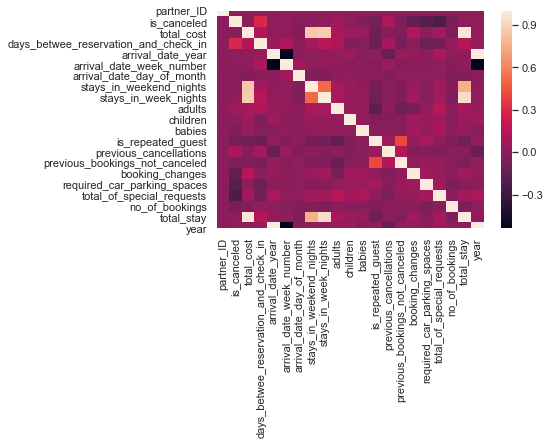

In [49]:
#profit for 3 years
partnerIDs = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]

partner_cost=dict.fromkeys(partnerIDs, 0)

for j in partnerIDs:
    eachPartnerID = main_data['partner_ID'] == j
    eachPartner = main_data[eachPartnerID]
    partner_cost[j]= sum(eachPartner['total_cost']/26)
    
print(partner_cost)


{1: 5818.846153846168, 2: 6100.769230769245, 3: 6178.846153846176, 4: 5799.615384615402, 5: 5877.692307692321, 6: 6239.615384615392, 7: 6434.615384615395, 8: 6011.153846153863, 9: 5418.461538461555, 10: 5625.769230769243, 11: 6091.923076923089, 12: 6252.692307692323, 13: 6009.615384615391, 14: 6158.07692307694, 15: 6093.076923076941, 16: 5812.692307692328, 17: 5836.153846153858, 18: 6176.923076923084, 19: 6159.230769230791, 20: 6075.769230769254, 21: 6095.38461538463, 22: 5807.692307692322, 23: 5701.153846153857, 24: 6303.076923076945, 25: 5882.307692307703, 26: 5698.461538461557, 27: 6094.2307692307895, 28: 6243.076923076935, 29: 6061.92307692309, 30: 5510.000000000008}


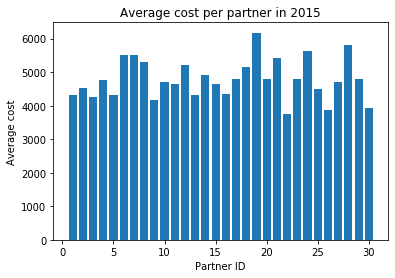

In [101]:
plt.bar(year_2015_cost.keys(),year_2015_cost.values())
plt.title('Average cost per partner in 2015')
plt.xlabel('Partner ID')
plt.ylabel('Average cost')



plt.show()


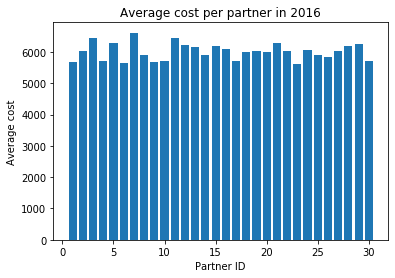

In [98]:
plt.bar(year_2016_cost.keys(),year_2016_cost.values())
plt.title('Average cost per partner in 2016')
plt.xlabel('Partner ID')
plt.ylabel('Average cost')

plt.show()

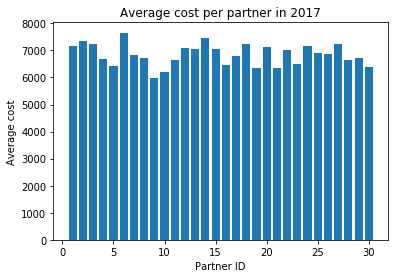

In [99]:
plt.bar(year_2017_cost.keys(),year_2017_cost.values())
plt.title('Average cost per partner in 2017')
plt.xlabel('Partner ID')
plt.ylabel('Average cost')

plt.show()

In [100]:
#for 3 years
plt.bar(partner_cost.keys(),partner_cost.values())
plt.show()


NameError: name 'partner_cost' is not defined

In [339]:
#manwhitney u test
from scipy import stats
from scipy.stats import mannwhitneyu

partnerIDs = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]
pList=[]
statList=[]
partner_cost=dict.fromkeys(partnerIDs, 0)

for j in partnerIDs:
    eachPartnerID = main_data['partner_ID'] == j
    eachPartner = main_data[eachPartnerID]
    partner_cost[j]= eachPartner['total_cost']

for key1 in partner_cost:  
    for key2 in partner_cost:
        if(key1 != key2):
            value1 = partner_cost[key1]
            value2 = partner_cost[key2]
            stat, p = mannwhitneyu(value1, value2)
            statList.append(stat)
            pList.append(p)
sum=0
avg=0
print(len(pList))
less_p=[]
for i in (pList):
    sum=(sum+i)
    avg=sum/870
print(avg)    
    


870
0.23554133057930296


In [315]:
hotelDF

,Date_range,25,21,18,2,28,27,6,22,8,...,4,20,9,23,15,29,13,16,17,5
0,2015-07-01,3,1,1,1,0,0,1,0,0,...,0,0,1,2,1,0,0,1,1,0
1,2015-07-02,3,2,3,1,1,1,1,0,0,...,0,2,1,2,1,0,1,1,1,0
2,2015-07-03,2,2,4,1,2,2,2,1,1,...,0,2,1,0,1,0,1,0,0,0
3,2015-07-04,1,2,4,1,1,1,3,1,1,...,2,1,1,0,1,0,0,0,0,1
4,2015-07-05,0,2,4,2,1,0,1,2,2,...,2,1,1,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
788,2017-08-27,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
789,2017-08-28,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
790,2017-08-29,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
791,2017-08-30,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [251]:
main_data

,partner_ID,hotel,is_canceled,total_cost,days_betwee_reservation_and_check_in,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,...,reserved_room_type,assigned_room_type,booking_changes,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Check_in_Date,no_of_bookings,monthNo
0,25,Resort Hotel,0,50,7,2015,July,27,1,0,...,A,C,0,0,0,Check-Out,2/7/15,2015-07-01,1,7.0
1,21,Resort Hotel,1,150,75,2015,July,27,1,0,...,D,D,0,0,0,Canceled,22/04/2015,2015-07-01,1,7.0
2,18,Resort Hotel,0,430,127,2015,July,27,1,2,...,D,I,0,0,1,Check-Out,1/7/15,2015-07-01,1,7.0
3,2,Resort Hotel,0,910,95,2015,July,27,1,4,...,D,D,0,0,0,Check-Out,16/07/2015,2015-07-01,1,7.0
4,18,Resort Hotel,0,240,36,2015,July,27,2,1,...,D,D,0,0,1,Check-Out,6/7/15,2015-07-02,1,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21061,27,City Hotel,0,430,212,2017,August,35,28,2,...,A,A,0,0,0,Check-Out,4/9/17,2017-08-28,0,8.0
21062,6,City Hotel,0,290,261,2017,August,35,30,1,...,A,A,0,0,0,Check-Out,4/9/17,2017-08-30,0,8.0
21063,24,City Hotel,0,220,175,2017,August,35,31,1,...,A,A,0,0,1,Check-Out,4/9/17,2017-08-31,0,8.0
21064,5,City Hotel,0,340,165,2017,August,35,29,1,...,E,E,0,0,3,Check-Out,4/9/17,2017-08-29,0,8.0


In [162]:
main_data.to_csv('hotel_data_with_no_of_booking.csv')

In [252]:
from sklearn import preprocessing 
  
label_encoder = preprocessing.LabelEncoder() 
col=['hotel','meal_booked','market_segment','distribution_channel','reservation_status','reserved_room_type', 'assigned_room_type','Check_in_Date']
for i in col:
    main_data[i]= label_encoder.fit_transform(main_data[i])  
    print(i)
main_data


hotel
meal_booked
market_segment
distribution_channel
reservation_status
reserved_room_type
assigned_room_type
Check_in_Date


,partner_ID,hotel,is_canceled,total_cost,days_betwee_reservation_and_check_in,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,...,reserved_room_type,assigned_room_type,booking_changes,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Check_in_Date,no_of_bookings,monthNo
0,25,1,0,50,7,2015,July,27,1,0,...,0,2,0,0,0,1,2/7/15,0,1,7.0
1,21,1,1,150,75,2015,July,27,1,0,...,3,3,0,0,0,0,22/04/2015,0,1,7.0
2,18,1,0,430,127,2015,July,27,1,2,...,3,8,0,0,1,1,1/7/15,0,1,7.0
3,2,1,0,910,95,2015,July,27,1,4,...,3,3,0,0,0,1,16/07/2015,0,1,7.0
4,18,1,0,240,36,2015,July,27,2,1,...,3,3,0,0,1,1,6/7/15,1,1,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21061,27,0,0,430,212,2017,August,35,28,2,...,0,0,0,0,0,1,4/9/17,788,0,8.0
21062,6,0,0,290,261,2017,August,35,30,1,...,0,0,0,0,0,1,4/9/17,790,0,8.0
21063,24,0,0,220,175,2017,August,35,31,1,...,0,0,0,0,1,1,4/9/17,791,0,8.0
21064,5,0,0,340,165,2017,August,35,29,1,...,4,4,0,0,3,1,4/9/17,789,0,8.0


In [68]:
main_data.loc[main_data.arrival_date_month == 'January', 'monthNo'] = 1
main_data.loc[main_data.arrival_date_month == 'February', 'monthNo'] = 2
main_data.loc[main_data.arrival_date_month == 'March', 'monthNo'] = 3
main_data.loc[main_data.arrival_date_month == 'April', 'monthNo'] = 4
main_data.loc[main_data.arrival_date_month == 'May', 'monthNo'] = 5
main_data.loc[main_data.arrival_date_month == 'June', 'monthNo'] = 6
main_data.loc[main_data.arrival_date_month == 'July', 'monthNo'] = 7
main_data.loc[main_data.arrival_date_month == 'August', 'monthNo'] = 8
main_data.loc[main_data.arrival_date_month == 'September', 'monthNo'] = 9
main_data.loc[main_data.arrival_date_month == 'October', 'monthNo'] = 10
main_data.loc[main_data.arrival_date_month == 'November', 'monthNo'] = 11
main_data.loc[main_data.arrival_date_month == 'December', 'monthNo'] = 12
main_data

,partner_ID,hotel,is_canceled,total_cost,days_betwee_reservation_and_check_in,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,...,booking_changes,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Check_in_Date,no_of_bookings,total_stay,year,monthNo
0,25,Resort Hotel,0,50,7,2015,July,27,1,0,...,0,0,0,Check-Out,2/7/15,2015-07-01,1,1,2015,7.0
1,21,Resort Hotel,1,150,75,2015,July,27,1,0,...,0,0,0,Canceled,22/04/2015,2015-07-01,1,3,2015,7.0
2,18,Resort Hotel,0,430,127,2015,July,27,1,2,...,0,0,1,Check-Out,1/7/15,2015-07-01,1,7,2015,7.0
3,2,Resort Hotel,0,910,95,2015,July,27,1,4,...,0,0,0,Check-Out,16/07/2015,2015-07-01,1,15,2015,7.0
4,18,Resort Hotel,0,240,36,2015,July,27,2,1,...,0,0,1,Check-Out,6/7/15,2015-07-02,1,4,2015,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21061,27,City Hotel,0,430,212,2017,August,35,28,2,...,0,0,0,Check-Out,4/9/17,2017-08-28,0,7,2017,8.0
21062,6,City Hotel,0,290,261,2017,August,35,30,1,...,0,0,0,Check-Out,4/9/17,2017-08-30,0,5,2017,8.0
21063,24,City Hotel,0,220,175,2017,August,35,31,1,...,0,0,1,Check-Out,4/9/17,2017-08-31,0,4,2017,8.0
21064,5,City Hotel,0,340,165,2017,August,35,29,1,...,0,0,3,Check-Out,4/9/17,2017-08-29,0,6,2017,8.0


array([8])

In [194]:
main_data['arrival_date_month'].unique()

array([8])

In [276]:
main_data.columns

Index(['partner_ID', 'hotel', 'is_canceled', 'total_cost',
       'days_betwee_reservation_and_check_in', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal_booked',
       'market_segment', 'distribution_channel', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'reserved_room_type', 'assigned_room_type', 'booking_changes',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'Check_in_Date',
       'no_of_bookings', 'monthNo'],
      dtype='object')

In [279]:
reg = LinearRegression()
reg.fit(X1, y1)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [286]:
X1.columns

Index(['partner_ID', 'hotel', 'total_cost',
       'days_betwee_reservation_and_check_in', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal_booked',
       'market_segment', 'distribution_channel', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'reserved_room_type', 'assigned_room_type', 'booking_changes',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'no_of_bookings', 'monthNo'],
      dtype='object')

In [108]:
reg = LinearRegression()
reg.fit(X1, y)
print('Coefficients: \n', reg.coef_)


ValueError: Found input variables with inconsistent numbers of samples: [780, 21066]

In [109]:
X = np.column_stack((main_data['partner_ID'], main_data['hotel'], main_data['no_of_bookings'] , main_data['total_cost'], main_data['days_betwee_reservation_and_check_in'], main_data['arrival_date_week_number'], main_data['arrival_date_day_of_month'], main_data['stays_in_weekend_nights'], main_data['stays_in_week_nights'], main_data['adults'], main_data['children'], main_data['babies'], main_data['meal_booked'], main_data['market_segment'], main_data['distribution_channel'], main_data['is_repeated_guest'],main_data['previous_cancellations'],main_data['previous_bookings_not_canceled'],main_data['reserved_room_type'],main_data['assigned_room_type'],main_data['booking_changes'],main_data['required_car_parking_spaces'],main_data['total_of_special_requests'],main_data['monthNo'],main_data['reservation_status']))
y = main_data['is_canceled']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())


TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [ ]:
X = main_data.drop(['no_of_bookings','reservation_status_date', 'arrival_date_month','Check_in_Date','arrival_date_year'], axis=1)
y = main_data['no_of_bookings']


In [259]:
reg = LinearRegression()
reg.fit(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [273]:
X.columns

Index(['partner_ID', 'hotel', 'is_canceled', 'total_cost',
       'days_betwee_reservation_and_check_in', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal_booked',
       'market_segment', 'distribution_channel', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'reserved_room_type', 'assigned_room_type', 'booking_changes',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'monthNo'],
      dtype='object')

In [110]:
X = np.column_stack((main_data['partner_ID'], main_data['hotel'], main_data['is_canceled'], main_data['total_cost'], main_data['days_betwee_reservation_and_check_in'], main_data['arrival_date_week_number'], main_data['arrival_date_day_of_month'], main_data['stays_in_weekend_nights'], main_data['stays_in_week_nights'], main_data['adults'], main_data['children'], main_data['babies'], main_data['meal_booked'], main_data['market_segment'], main_data['distribution_channel'], main_data['is_repeated_guest'],main_data['previous_cancellations'],main_data['previous_bookings_not_canceled'],main_data['reserved_room_type'],main_data['assigned_room_type'],main_data['booking_changes'],main_data['required_car_parking_spaces'],main_data['total_of_special_requests'],main_data['monthNo'],main_data['reservation_status']))
y =  main_data['no_of_bookings']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())


TypeError: unsupported operand type(s) for -: 'str' and 'str'

hotel
meal_booked
market_segment
distribution_channel
reservation_status
reserved_room_type
assigned_room_type
Check_in_Date


,partner_ID,hotel,is_canceled,total_cost,days_betwee_reservation_and_check_in,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,...,reserved_room_type,assigned_room_type,booking_changes,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Check_in_Date,no_of_bookings,bookings_per_month
0,25,1,0,50,7,2015,July,27,1,0,...,0,2,0,0,0,1,2/7/15,0,1,680
1,21,1,1,150,75,2015,July,27,1,0,...,3,3,0,0,0,0,22/04/2015,0,1,680
2,18,1,0,430,127,2015,July,27,1,2,...,3,8,0,0,1,1,1/7/15,0,1,680
3,2,1,0,910,95,2015,July,27,1,4,...,3,3,0,0,0,1,16/07/2015,0,1,680
4,18,1,0,240,36,2015,July,27,2,1,...,3,3,0,0,1,1,6/7/15,1,1,680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21061,27,0,0,430,212,2017,August,35,28,2,...,0,0,0,0,0,1,4/9/17,788,0,680
21062,6,0,0,290,261,2017,August,35,30,1,...,0,0,0,0,0,1,4/9/17,790,0,680
21063,24,0,0,220,175,2017,August,35,31,1,...,0,0,0,0,1,1,4/9/17,791,0,680
21064,5,0,0,340,165,2017,August,35,29,1,...,4,4,0,0,3,1,4/9/17,789,0,680


In [149]:
main_data['distribution_channel']

0        1
1        3
2        3
3        3
4        3
        ..
21061    3
21062    1
21063    3
21064    3
21065    3
Name: distribution_channel, Length: 21066, dtype: int64

In [78]:



for i in main_data['arrival_date_month']:
    print(i)
    if (i=='January'):
        main_data['arrival_date_month']=='1'
    elif(i=='February'):   
        main_data['arrival_date_month']=='2'
    elif(i=='march'):   
                main_data['arrival_date_month']=='3'
    elif(i=='April'):   
        main_data['arrival_date_month']=='4'
    elif(i=='May'):   
        main_data['arrival_date_month']=='5'
    elif(i=='June'):   
        main_data['arrival_date_month']=='6'
    elif(i=='July'):   
        main_data['arrival_date_month']=='7'
    elif(i=='August'):   
        main_data['arrival_date_month']=='8'
    elif(i=='September'):   
        main_data['arrival_date_month']=='9'
    elif(i=='October'):   
        main_data['arrival_date_month']=='10'
    elif(i=='November'):   
        main_data['arrival_date_month']=='11'
    elif(i=='December'):   
        main_data['arrival_date_month']=='12'
    










5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
1

7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
0
7
0
7
7
0
7
7
7
7
0
0
0
0
0
7
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
8
6
5
5
11
2
7
0
0
0
0
3
0
0
3
0
0
0
0
0
0
0
0
10
0
0
0
0
0
0
0
0
0
0
0
0
9
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
5
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
3
0
0
0
0
7
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
8
0
0
0
0
8
0
8
5
0
8
6
5
1
6
5
0
5
8
8
8
8
8
8
6
8
8
0
0
0
0
0
8
0
0
8
8
8
8
8
7
7
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
6
8
8
8
8
8
8
8
8
8
8
10
3
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
7
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
9
8
8
8
8
5
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
2
8
8
8
8
8
6
6
6
6
8
8
8
8
8
8
6
8
6
6
8
8
6
8
8
8
8
8
6
6
8
6
8
6
8
8
6
6
6
6
6
6
6
6
6
6
6
6
8
6
6
6
6
6
6
6
8
6
6
6
6
8
6
6
6
6
6
6
6
5
6
6
6
6
6
6
6
6
6
6

3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
1
1
1
1
1
1
11
11
11
11
11
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
1
1
1
1
1
1
1
1
1
1
1
1
1
1
11
11
11
11
11
11
11
11
11
11
10
10
10
10
10
5
5
5
5
5
5
5
5
10
10
10
5
5
5

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
4
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
4
5
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
10
8
1
1
1
1
1
1
1
1
1
1
1
1
11
11
1
11
11
1
1
11
1
11
11
11
11
1
11
1
1
1
1
1
11
11
11
1
1
1
11
11
11
11
11
11
11
11
1
11
11
11
11
1
1
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
6
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
5
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


In [77]:
    print(main_data['arrival_date_month'].unique() )

[ 5  1 11 10  9  2  4  3  7  0  8  6]
